# Aleatoric uncertainty

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

from models import *
from utils import *
from loss import *

## Data

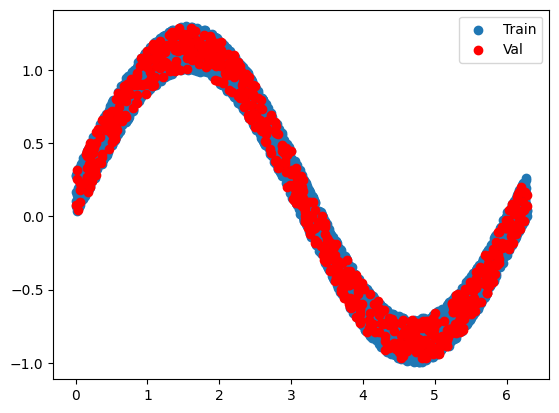

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [11]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True, drop_last=True)

## Deep ensemble

In [22]:
base_model = MLP(acu_uncertainty=True) 
optimizer = torch.optim.Adam(base_model.parameters(), lr=0.01)
criterion = acu_loss
trainer(base_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss -1.7721762657165527 :::: Val loss -1.7683753967285156 

Epoch: 20 :::: Train loss -1.8618638515472412 :::: Val loss -1.8378702402114868 

Epoch: 30 :::: Train loss -1.8443050384521484 :::: Val loss -1.7295749187469482 

Epoch: 40 :::: Train loss -1.860459566116333 :::: Val loss -1.864916443824768 

Epoch: 50 :::: Train loss -1.8247575759887695 :::: Val loss -1.8913099765777588 

Epoch: 60 :::: Train loss -1.8388442993164062 :::: Val loss -1.8680909872055054 

Epoch: 70 :::: Train loss -1.8637051582336426 :::: Val loss -1.8397952318191528 

Epoch: 80 :::: Train loss -1.8519728183746338 :::: Val loss -1.8567835092544556 

Epoch: 90 :::: Train loss -1.8598812818527222 :::: Val loss -1.9137717485427856 

Epoch: 100 :::: Train loss -1.8973217010498047 :::: Val loss -1.847678542137146 



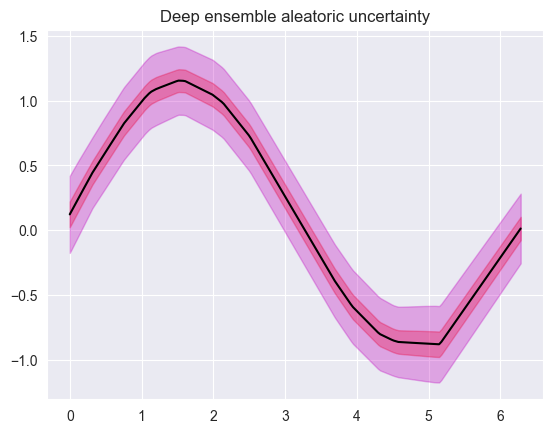

In [28]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)

y_model = base_model(x_plot.to('cuda'))
y_model = y_model.cpu().detach()

y_mean = y_model[:,0]
y_std = torch.sqrt(torch.exp(y_model[:,1]))

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble aleatoric uncertainty')

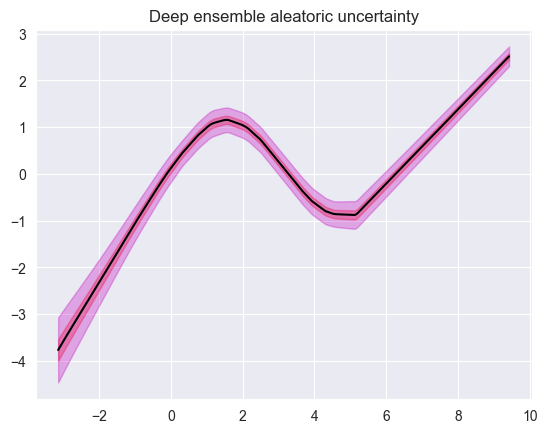

In [29]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = base_model(x_plot.to('cuda'))
y_model = y_model.cpu().detach()

y_mean = y_model[:,0]
y_std = torch.sqrt(torch.exp(y_model[:,1]))

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble aleatoric uncertainty')

## Masksemble

In [26]:
mask_model = MLP_Maksembles(4,2.0,acu_uncertainty=True) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.01)
criterion = acu_loss
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss -1.7080857753753662 :::: Val loss -1.718123435974121 

Epoch: 20 :::: Train loss -1.7548229694366455 :::: Val loss -1.734636664390564 

Epoch: 30 :::: Train loss -1.8460912704467773 :::: Val loss -1.871973991394043 

Epoch: 40 :::: Train loss -1.8519400358200073 :::: Val loss -1.900789499282837 

Epoch: 50 :::: Train loss -1.8565847873687744 :::: Val loss -1.8770719766616821 

Epoch: 60 :::: Train loss -1.850671410560608 :::: Val loss -1.8936446905136108 

Epoch: 70 :::: Train loss -1.8615635633468628 :::: Val loss -1.7581126689910889 

Epoch: 80 :::: Train loss -1.8508384227752686 :::: Val loss -1.8789972066879272 

Epoch: 90 :::: Train loss -1.8702481985092163 :::: Val loss -1.8808339834213257 

Epoch: 100 :::: Train loss -1.8460601568222046 :::: Val loss -1.8723585605621338 



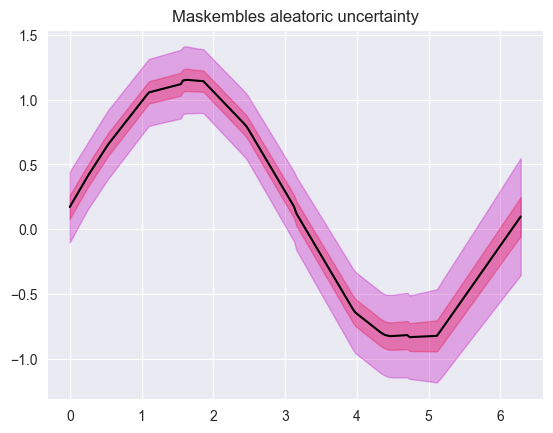

In [30]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)

y_model = mask_model(x_plot.to('cuda'))
y_model = y_model.cpu().detach()

y_mean = y_model[:,0]
y_std = torch.sqrt(torch.exp(y_model[:,1]))

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles aleatoric uncertainty')

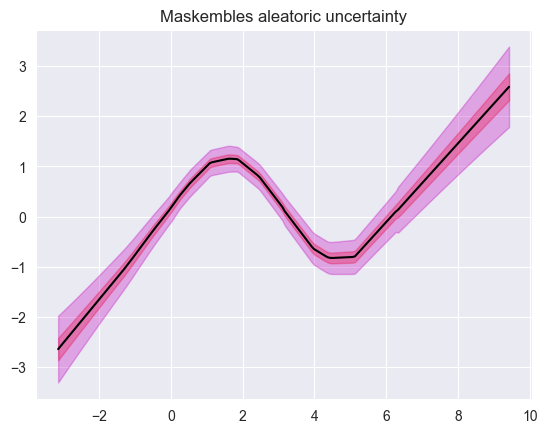

In [33]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = mask_model(x_plot.to('cuda'))
y_model = y_model.cpu().detach()

y_mean = y_model[:,0]
y_std = torch.sqrt(torch.exp(y_model[:,1]))

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles aleatoric uncertainty')


## Dropout

In [62]:
drop_model = MLP_Dropout(acu_uncertainty=True) 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.01)
criterion = acu_loss
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss -0.8802774548530579 :::: Val loss -0.9037109017372131 

Epoch: 20 :::: Train loss -0.9283828735351562 :::: Val loss -0.9390053749084473 

Epoch: 30 :::: Train loss -0.9674016833305359 :::: Val loss -1.0319806337356567 

Epoch: 40 :::: Train loss -0.9412145614624023 :::: Val loss -1.0288406610488892 

Epoch: 50 :::: Train loss -0.9666222333908081 :::: Val loss -1.0425052642822266 

Epoch: 60 :::: Train loss -0.9925215840339661 :::: Val loss -1.0326564311981201 

Epoch: 70 :::: Train loss -0.9839560985565186 :::: Val loss -1.086669921875 

Epoch: 80 :::: Train loss -0.977306067943573 :::: Val loss -1.064496397972107 

Epoch: 90 :::: Train loss -1.013912320137024 :::: Val loss -1.0785564184188843 

Epoch: 100 :::: Train loss -1.0041953325271606 :::: Val loss -1.1371500492095947 



In [64]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

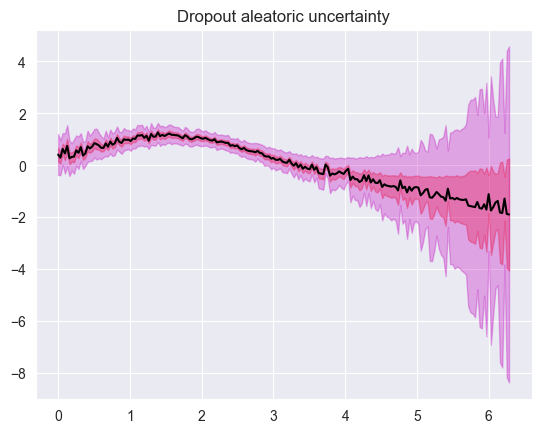

In [65]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)
N_model = 4

y_model = drop_model(x_plot.to('cuda'))
y_model = y_model.cpu().detach()

y_mean = y_model[:,0]
y_std = torch.sqrt(torch.exp(y_model[:,1]))

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout aleatoric uncertainty')

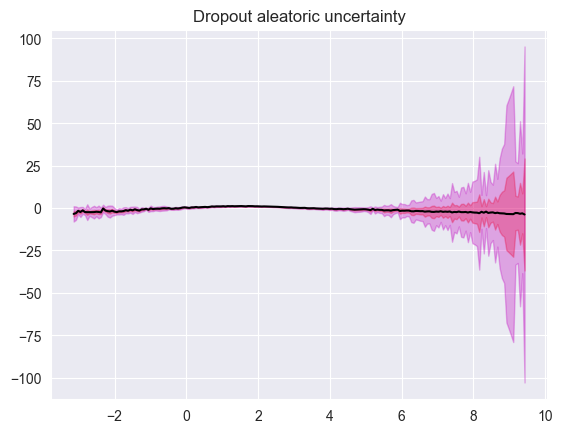

In [66]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = drop_model(x_plot.to('cuda'))
y_model = y_model.cpu().detach()

y_mean = y_model[:,0]
y_std = torch.sqrt(torch.exp(y_model[:,1]))

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout aleatoric uncertainty')